In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
from matplotlib import lines as mlines
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

nfiles = {}
nfiles['2016'] = 43
nfiles['2017'] = 43
nfiles['2018'] = 51

with open('xsec.json') as f:
  xs = json.load(f)

In [3]:
outsum = processor.dict_accumulator()

for year in ['2017']: #['2016','2017','2018']:
    for n in range(1,nfiles[year]+1):
        print(n)
        out = util.load('condor/outfiles/'+year+'_'+str(n)+'.coffea')
        #print(out)
        outsum.add(out)
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['templates'].scale(scale_lumi, 'dataset')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [4]:
pmap = {}

pmap['ZH'] = ['ZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8',
              'ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8',
              'ggZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8',
              'ggZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8',
             ]
pmap['WH'] = ['WminusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8',
              'WplusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8',
             ]
pmap['ttH'] = ['ttHTobb_M125_13TeV-powheg-pythia8']
pmap['VBF'] = ['VBFHToBB_M-125_13TeV_powheg_pythia8']
#pmap['ggF-powheg'] = ['GluGluHToBB_M125_13TeV_powheg_pythia8']
pmap['ggF'] = ['GluGluHToBB_M-125_13TeV_powheg_MINLO_NNLOPS_pythia8']
#pmap['ggF-amcnlo'] = ['GluGluHToBB_M125_LHEHpT_250-Inf_13TeV_amcatnloFXFX_pythia8']

pmap['QCD'] = ['QCD_HT500to700_13TeV-madgraphMLM-pythia8',
               'QCD_HT700to1000_13TeV-madgraphMLM-pythia8',
               'QCD_HT1000to1500_13TeV-madgraphMLM-pythia8',
               'QCD_HT1500to2000_13TeV-madgraphMLM-pythia8',
               'QCD_HT2000toInf_13TeV-madgraphMLM-pythia8',
             ]

pmap['VV'] = ['WW_13TeV-pythia8',
              'ZZ_13TeV-pythia8',
              'WZ_13TeV-pythia8',
             ]

pmap['Wjets'] = ['WJetsToQQ_HT800toInf_qc19_3j_13TeV-madgraphMLM-pythia8',
                  'WJetsToQQ_HT400to600_qc19_3j_13TeV-madgraphMLM-pythia8',
                  'WJetsToQQ_HT600to800_qc19_3j_13TeV-madgraphMLM-pythia8',
                 ]

pmap['Zjets'] = ['ZJetsToQQ_HT800toInf_qc19_4j_13TeV-madgraphMLM-pythia8',
                  'ZJetsToQQ_HT400to600_qc19_4j_13TeV-madgraphMLM-pythia8',
                  'ZJetsToQQ_HT600to800_qc19_4j_13TeV-madgraphMLM-pythia8',
                 ]

pmap['ttbar'] = ['TTToHadronic_13TeV-powheg-pythia8',
               'TTToSemiLeptonic_13TeV-powheg-pythia8',
               'ST_t-channel_antitop_4f_inclusiveDecays_13TeV-powheg-madspin-pythia8'
                ]

pmap['singlet'] = ['ST_t-channel_top_4f_inclusiveDecays_13TeV-powheg-madspin-pythia8',
                   'ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8',
                   'ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8',
                  ]

In [5]:
templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

In [6]:
ptbins = [450, 500, 550, 600, 675, 800, 1200]

In [7]:
os.system('rm signalregion.root')
fout = uproot.create('signalregion.root')
for i,b in enumerate(ptbins[:-1]):
    for p in pmap.keys():  
        h = templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1])).integrate('ddb1',int_range=slice(0.89,1)).integrate('process',p)
        fout[p+"_pass_pt"+str(i+1)] = hist.export1d(h)
        h = templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1])).integrate('ddb1',int_range=slice(0,0.89)).integrate('process',p)
        fout[p+"_fail_pt"+str(i+1)] = hist.export1d(h)

fout.close()

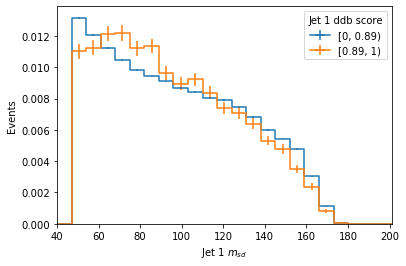

In [8]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[0],ptbins[1])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt1.png')

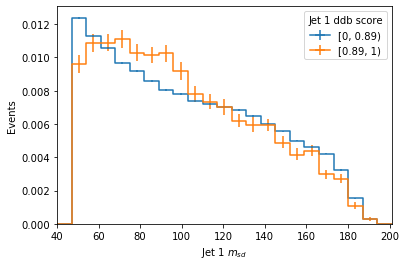

In [9]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[1],ptbins[2])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt2.png')

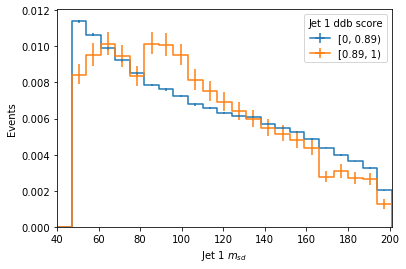

In [10]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[2],ptbins[3])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt3.png')

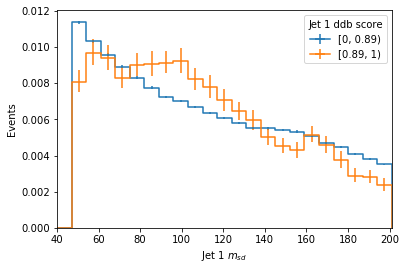

In [11]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[3],ptbins[4])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt4.png')

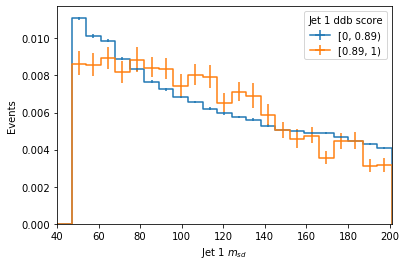

In [12]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[4],ptbins[5])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt5.png')

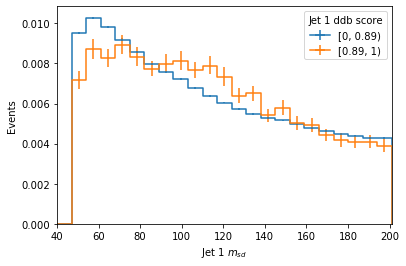

In [13]:
hist.plot1d(templates.sum('rho1').integrate('region', 'signal').integrate('pt1',int_range=slice(ptbins[5],ptbins[6])).integrate('process','QCD'),overlay='ddb1',density=True)
plt.savefig('plot-all/qcd-msd-pt6.png')